In [4]:
import numpy as np
import pandas as pd
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.models import word2vec

In [5]:
# load model
model = word2vec.Word2Vec.load('model_judge_d250_sg_s10_ep10.model')

In [3]:
# 找出相近詞
model.wv.most_similar('傷害')

[('挫傷', 0.6076574921607971),
 ('告訴人', 0.593547523021698),
 ('受', 0.5911338329315186),
 ('傷勢', 0.5649699568748474),
 ('及', 0.5602191686630249),
 ('俊安受', 0.5472379922866821),
 ('被告', 0.5450658202171326),
 ('之', 0.5425775051116943),
 ('等', 0.5399006009101868),
 ('麗雪受', 0.5376203656196594)]

In [79]:
# 找出反義詞
model.wv.most_similar(negative='傷害', topn=20)

[('前要', 0.1024409681558609),
 ('即系爭', 0.09884321689605713),
 ('東邊', 0.09124729782342911),
 ('南投市', 0.08345993608236313),
 ('淡', 0.08301080018281937),
 ('觀測', 0.08197206258773804),
 ('里程', 0.07701798528432846),
 ('灑水車', 0.07264010608196259),
 ('所發', 0.07191414386034012),
 ('經領', 0.07131264358758926),
 ('但當', 0.07079596072435379),
 ('換為', 0.07010647654533386),
 ('另一半', 0.06902024894952774),
 ('空檔', 0.0689033791422844),
 ('早操', 0.06844563782215118),
 ('篇', 0.06759829074144363),
 ('場區', 0.06732318550348282),
 ('中研院', 0.06706677377223969),
 ('自燃', 0.06522875279188156),
 ('浮水印', 0.06439513713121414)]

In [69]:
result = model.wv.most_similar(positive=['傷害', '傷害罪'], negative=['家暴'])
print("{}: {:.4f}".format(*result[0]))

普通傷害罪: 0.6165


In [96]:
result = model.wv.most_similar(positive=['傷害','家暴'])#, negative=['家暴'])
print(result)

[('遭葉泰原', 0.6036947965621948), ('孜均', 0.5755122303962708), ('傷異狀', 0.5727447271347046), ('無念', 0.5658690333366394), ('妻葉懿', 0.5645961761474609), ('楊正華前', 0.5642986297607422), ('固無置', 0.5640904903411865), ('翁黃此', 0.5639004111289978), ('對陳振豪', 0.5637339949607849), ('江惠珍', 0.5616114735603333)]


In [58]:
def analogy(x1, x2, y1):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [63]:
analogy('傷害', '被害人', '家暴')

'社工'

In [ ]:
result = model.wv.most_similar(positive=[y1, x2], negative=[x1])

result[0][0]

In [19]:
print(model.wv.doesnt_match("breakfast cereal dinner lunch".split()))

lunch


In [57]:
load_model('model_judge_d250_sg_s10_ep10.model')

In [92]:
words = ['傷害罪','最好是']
most_similar(model, words)

最好是 is not found in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>


,傷害罪,cosin
0,普通傷害罪,0.910612
1,277,0.768736
2,罪及,0.730731
3,項之強,0.716900
4,損罪,0.686902
5,傷害人之身體罪,0.683475
6,條之毀,0.668236
7,傷害直系血親尊親屬罪,0.657478
8,制罪,0.655864
9,條毀,0.648090


In [86]:
# 讀取 model 方法
def load_model(w2v_model):
    model = word2vec.Word2Vec.load(w2v_model)

In [56]:
# 相似度方法 dataframe cosin

def most_similar(w2v_model, words, topn=None):
    if topn == None:
        topn = 10
    else:
        topn = topn       
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cosin'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(f"{word} is not found in {w2v_model}")
    return similar_df

In [6]:
# 設定 matplotlib 字型，可顯示中文
import matplotlib
import matplotlib.font_manager
print(matplotlib.__file__)
# a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
# for i in a:
#     print(i)    
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

C:\Users\student\anaconda3\envs\python3\lib\site-packages\matplotlib\__init__.py


In [7]:
# PCA + plot + 過濾沒有在 model 的字
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(model.wv.index_to_key, sample)
        else:
            words = [ word for word in model.wv.key_to_index ]
    vector_list = []
    for w in words:
        try:
            vector = model.wv[w]
            vector_list.append(vector)
            word_vectors = np.array(vector_list)
        except:
            print(f'{w} is not in {model}')
            
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='face', c='#FF7575', marker='o')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
            

In [2]:
words = pd.read_csv(path)

NameError: name 'pd' is not defined

In [3]:
# def words_to_dataframe(word_list):
word_list = []
vec_list = []

word = model.wv.index_to_key
word_list.append(word)


for word in word_list[0]:
    vec = model.wv[word]
    vec_list.append(vec)



NameError: name 'model' is not defined

In [8]:
type(model.wv['傷害'])

model.wv['傷害'].std()

0.26670164

In [9]:
data = pd.read_csv('./feature_1207_12.csv', encoding='utf-8')
data

,其他,教育程度,Unnamed: 2,構成要件,Unnamed: 4,違法性,Unnamed: 6,罪責,Unnamed: 8,傷害方式,...,被告身心狀況,Unnamed: 26,被害身心狀況,Unnamed: 28,和解狀況,Unnamed: 30,告訴人和被告人之關係,Unnamed: 32,法官心證,Unnamed: 34
0,應予分論併罰,國小畢業,高中以下,傷害之犯意,傷害罪:1,不合於正當防衛,1.0,為累犯,1.0,徒手毆打,...,癲癇症,不良,癲癇症,不良,無法達成和、調解,有意願無成功,家庭成員關係,有血緣,未達於通常一般人不致有所懷疑,1.0
1,為想像競合犯,國小肄業,高中以下,傷害之不確定故意,傷害罪:1,尚符合正當防衛,0.0,不依刑法第47條第1項規定加重其刑,0.0,以頭撞擊,...,良性陣發性眩暈,不良,頸椎退化性脊椎炎,不良,無法達成和解,有意願無成功,家庭成員關係,有血緣,未達於一般人不致有所懷疑,1.0
2,洵不足採,初中畢業,高中以下,具有主觀上傷害之犯意,傷害罪:1,尚符合緊急避難,0.0,爰依刑法第62條前段之規定,2.0,推打,...,頸椎退化性脊椎炎,不良,高血壓,不良,無法達成調解,有意願無成功,有家庭暴力防治法第3條第4款規定之家庭成員關係,有血緣,無足採酌,1.0
3,依前揭規定加重其刑,初中肄業,高中以下,基於傷害,傷害罪:1,不合於緊急避難,1.0,符合自首要件,2.0,徒手推打,...,高血壓,不良,雙相情緒障礙症,不良,告訴人無和解意願,有意願無成功,有家庭暴力防治法第3條第1款規定之家庭成員關係,有血緣,犯後態度方面難以對被告為有利之考量,1.0
4,無因果關係,國中畢業,高中以下,毀敗或嚴重減損,重傷害:1,尚符合父母懲戒權,0.0,固為累犯,0.0,拳打腳踢,...,雙相情緒障礙症,不良,重度身心障礙,不良,有與告訴人和解之意願,有意願無成功,有家庭暴力防治法第3條第2款規定之家庭成員關係,有血緣,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# feature dataframe
features = data.drop(data.iloc[:,::2], axis=1)
features_list = []

for i in range(len(features.columns)):
    features_clean = features.iloc[:,i].dropna()#.valuse.tolist()
    for j in features_clean:
        features_list.append(j)
        
len(features_list)
        
    


            
            
# keywords_list = features.values.tolist()
# keywords_list

367

In [11]:
most_similar(model, features_list)

NameError: name 'most_similar' is not defined

In [65]:
df = most_similar(model, 
             ['傷害', '重傷害', '傷害致死', '新臺幣', '家暴', '易科罰金', '毆打', '累犯', '再犯', '書記官', '致', '罪'])

new_df = pd.DataFrame(df)

new_df.to_csv('new_df.csv', sep='\t', encoding='utf-8-sig')

重傷害 is not found in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
傷害致死 is not found in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>


洪聖祺 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
詹以 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
盧政良 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
黃柏 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
陳述 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
臺灣 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
基於 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
對於 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
案發現場 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
報告書 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
有無 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
刑事訴訟法 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
後來 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
案發地點 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>
哭鬧 is not in Word2Vec<vocab=766205, vector_size=250, alpha=0.025>


<IPython.core.display.Javascript object>


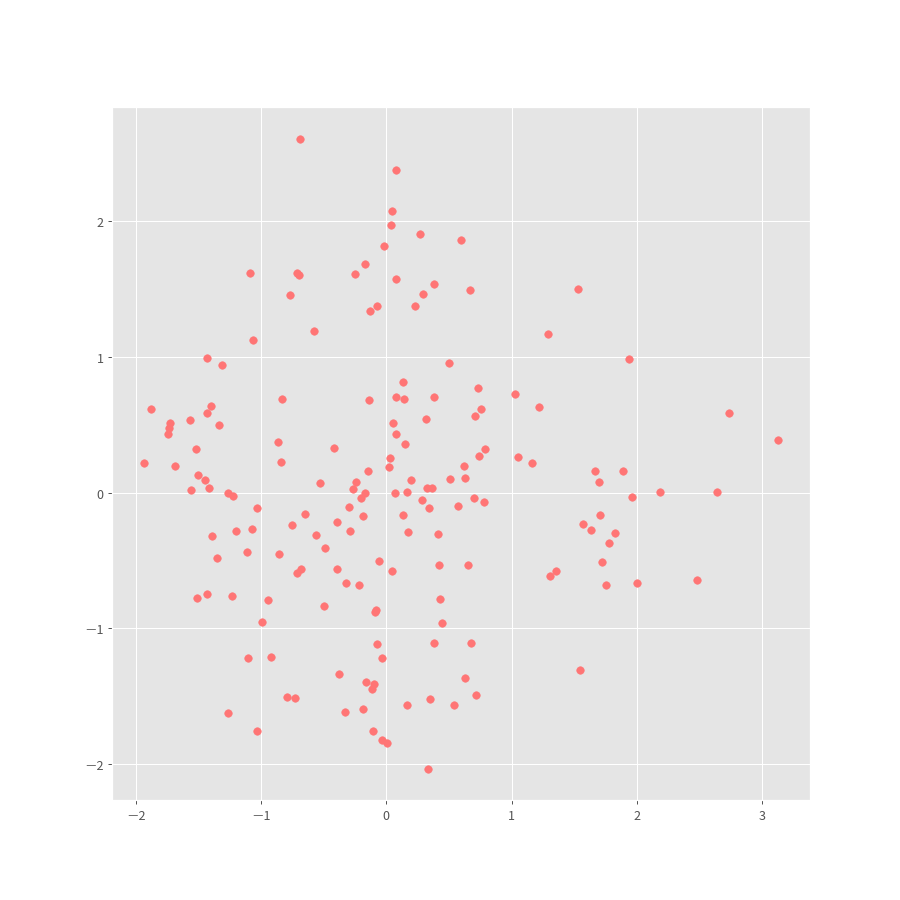

ValueError: too many values to unpack (expected 2)

In [12]:
import pandas as pd
keywords = pd.read_csv('./判決書-傑八切過/重傷害致死.csv', header=None, encoding='utf-8')

# print(keywords)

words1 = keywords[0]
# print(words1)

words1_list = list(words1)
# print(words1_list)


display_pca_scatterplot(model, words1_list)

<IPython.core.display.Javascript object>


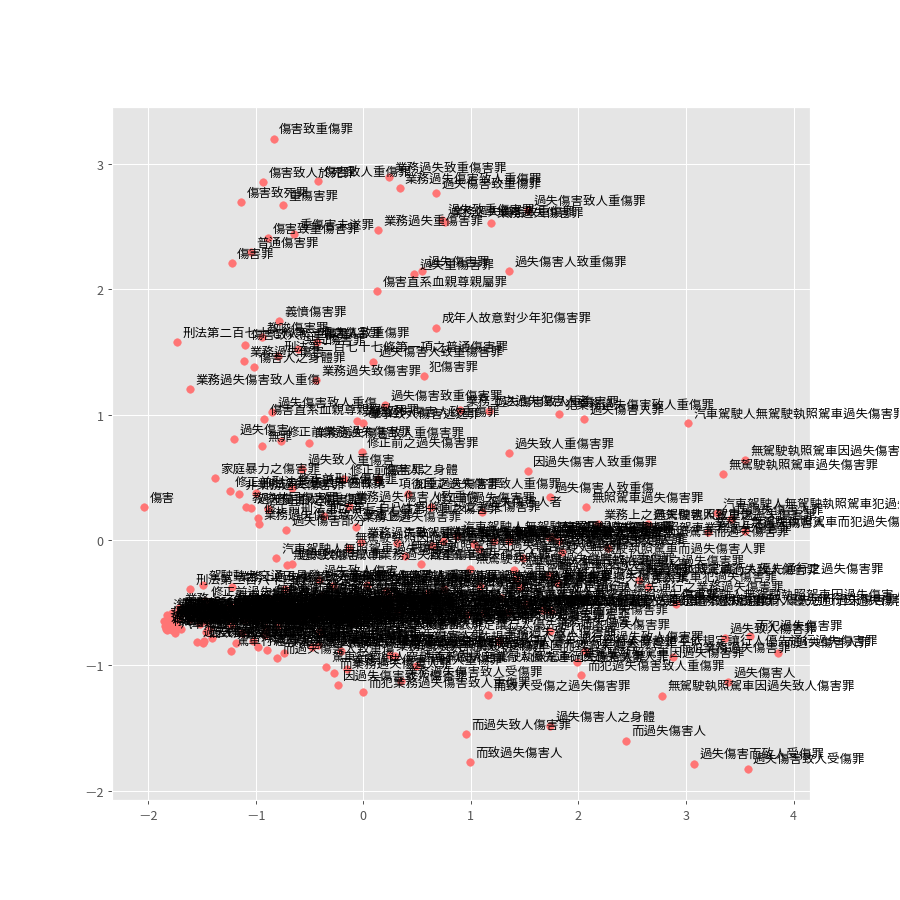

In [54]:
keyword = pd.read_csv('./Crime_.csv', encoding='utf-8')
keywordList = list(keyword['Crime_總表'])
keywordList



display_pca_scatterplot(model, keywordList)

### 降維 test

In [28]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pca
from sklearn.decomposition import PCA

In [29]:
# 查看詞向量
vec1 = model.wv['傷害']
vec1

array([-1.52907938e-01,  1.00410950e+00,  1.10781589e-03, -3.69494915e-01,
       -1.71492398e-01, -1.48895413e-01,  2.15256229e-01,  5.20328321e-02,
       -2.14576572e-02, -6.75072446e-02, -6.59449458e-01, -5.92062473e-01,
       -8.45132589e-01,  4.03052807e-01, -3.96031916e-01, -1.46638215e-01,
        3.86772662e-01,  5.59497714e-01,  3.66411209e-01, -8.37202147e-02,
       -4.02789146e-01, -3.23616534e-01, -9.10355300e-02,  8.80589664e-01,
        5.58567643e-02,  8.50631833e-01, -8.82473528e-01,  3.70455027e-01,
        8.66108775e-01,  9.08432305e-02,  1.31682903e-01,  5.79618692e-01,
       -9.04530436e-02, -4.85795408e-01,  2.61890143e-01, -3.88527453e-01,
       -4.05267179e-01, -2.47979581e-01, -3.24091136e-01,  2.24861786e-01,
        2.47231945e-01,  2.66549766e-01, -1.14722192e+00, -6.55316934e-02,
        1.67923927e-01,  7.93587714e-02, -5.84429801e-01,  4.76468265e-01,
        4.01702344e-01,  2.63261616e-01,  7.31865942e-01,  1.18688978e-01,
       -8.97536397e-01,  

In [36]:
pca.fit(vec1)
print(pca.explained_variance_)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.52907938e-01  1.00410950e+00  1.10781589e-03 -3.69494915e-01
 -1.71492398e-01 -1.48895413e-01  2.15256229e-01  5.20328321e-02
 -2.14576572e-02 -6.75072446e-02 -6.59449458e-01 -5.92062473e-01
 -8.45132589e-01  4.03052807e-01 -3.96031916e-01 -1.46638215e-01
  3.86772662e-01  5.59497714e-01  3.66411209e-01 -8.37202147e-02
 -4.02789146e-01 -3.23616534e-01 -9.10355300e-02  8.80589664e-01
  5.58567643e-02  8.50631833e-01 -8.82473528e-01  3.70455027e-01
  8.66108775e-01  9.08432305e-02  1.31682903e-01  5.79618692e-01
 -9.04530436e-02 -4.85795408e-01  2.61890143e-01 -3.88527453e-01
 -4.05267179e-01 -2.47979581e-01 -3.24091136e-01  2.24861786e-01
  2.47231945e-01  2.66549766e-01 -1.14722192e+00 -6.55316934e-02
  1.67923927e-01  7.93587714e-02 -5.84429801e-01  4.76468265e-01
  4.01702344e-01  2.63261616e-01  7.31865942e-01  1.18688978e-01
 -8.97536397e-01  5.54821551e-01 -8.94928575e-02 -4.94842529e-02
  3.40490490e-01 -9.30284023e-01  1.07731186e-01  9.67133164e-01
 -1.36354446e-01 -1.02393419e-01  6.76107481e-02  1.82669416e-01
 -2.56240964e-01 -4.58610535e-01  6.35785520e-01  6.89046085e-01
  1.13345154e-01 -4.03003901e-01 -2.09313426e-02  3.93626727e-02
 -2.33133107e-01  9.42798108e-02  5.98704278e-01 -1.96020052e-01
  4.02607262e-01  1.97985038e-01 -4.03890461e-01  4.42010939e-01
  5.12850702e-01  6.21844113e-01  2.75687188e-01  1.70779992e-02
 -8.35002959e-01  2.95573622e-01  2.03279689e-01  1.02932841e-01
 -2.23545849e-01  1.69135585e-01  5.17550886e-01  5.82495034e-02
 -5.18062711e-01 -2.17441246e-01 -6.51554540e-02  1.18534997e-01
  8.01242590e-01 -4.85046096e-02  8.12576413e-02  2.14820385e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
 X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [32]:
pca = PCA(n_components=2)

In [34]:
pca.fit(X)

PCA(n_components=2)

In [35]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [37]:
print(pca.singular_values_)

[6.30061232 0.54980396]


In [38]:
pca = PCA(n_components=2, svd_solver='full')

In [39]:
pca.fit(X)

PCA(n_components=2, svd_solver='full')

In [40]:
 print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [41]:
print(pca.singular_values_)

[6.30061232 0.54980396]
